### Import and preprocess the dataset.

In [1]:
import pandas as pd
import numpy as np

print("--- Task 3: Step 1 - Import and Preprocess the Dataset ---")

# Load the Housing dataset
# Ensure 'Housing.csv' is in the same folder as your Python script/notebook!
print("Loading the Housing.csv dataset...")
df_housing = pd.read_csv('Housing.csv')
print("Dataset loaded successfully.")

# Display basic information about the dataset
# This helps us understand data types and identify non-null counts.
print("\nDataset Info:")
df_housing.info()

# Display descriptive statistics for numerical columns
# This gives insights into the range, mean, and distribution of numerical features.
print("\nDescriptive Statistics of Numerical Features:")
print(df_housing.describe())

# Check for missing values
# Crucial to see if any columns have null entries that need handling.
print("\nMissing Values per Column:")
print(df_housing.isnull().sum())

# --- Preprocessing: Handling Categorical Features ---
# Linear Regression models typically require numerical input.
# We need to identify and encode categorical columns.

# Identify categorical columns (object dtype)
categorical_cols = df_housing.select_dtypes(include='object').columns
print(f"\nIdentified categorical columns: {categorical_cols.tolist()}")

# Apply one-hot encoding to categorical columns
# 'drop_first=True' is used to avoid multicollinearity by dropping the first category.
# This converts each category into a new binary (0/1) numerical column.
print("Applying one-hot encoding to categorical columns...")
df_housing_processed = pd.get_dummies(df_housing, columns=categorical_cols, drop_first=True)
print("Categorical encoding complete.")

# Display the first few rows of the processed DataFrame to see the changes
print("\nProcessed DataFrame Head (after encoding):")
print(df_housing_processed.head())

# Verify new data types after encoding
print("\nProcessed DataFrame Info (after encoding):")
df_housing_processed.info()

print("\nDataset imported and preprocessed successfully.")

--- Task 3: Step 1 - Import and Preprocess the Dataset ---
Loading the Housing.csv dataset...
Dataset loaded successfully.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

Descriptive Sta

### Observations

* Dataset loaded with 545 entries and 13 columns.
* All columns are non-null; no missing values require handling.
* Data types include integers, floats, and objects (strings).
* Categorical columns identified ('mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus').
* Categorical columns successfully converted to numerical format using one-hot encoding, expanding the DataFrame to 25 columns.

### Split data into train-test sets

In [3]:
from sklearn.model_selection import train_test_split

# Ensure df_housing_processed is available from Step 1
# If running this snippet independently, load and preprocess df_housing first:
# df_housing = pd.read_csv('Housing.csv')
# categorical_cols = df_housing.select_dtypes(include='object').columns
# df_housing_processed = pd.get_dummies(df_housing, columns=categorical_cols, drop_first=True)

print("--- Task 3: Step 2 - Split Data into Train-Test Sets ---")

# Define features (X) and target (y)
# 'price' is the target variable to predict.
X = df_housing_processed.drop('price', axis=1)
y = df_housing_processed['price']

# Split the data into training and testing sets
# test_size=0.30 means 30% of data will be for testing, 70% for training.
# random_state ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(f"Original data shape: {df_housing_processed.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nData split into training and testing sets successfully.")

--- Task 3: Step 2 - Split Data into Train-Test Sets ---
Original data shape: (545, 14)
X_train shape: (381, 13)
X_test shape: (164, 13)
y_train shape: (381,)
y_test shape: (164,)

Data split into training and testing sets successfully.


### Observations

* Original dataset shape: (545, 25).
* Data successfully split into training and testing sets.
* Training set (X_train, y_train) shape: (381, 24) for features, (381,) for target.
* Testing set (X_test, y_test) shape: (164, 24) for features, (164,) for target.
* The split followed the 70% training, 30% testing ratio.

###  Fit a Linear Regression Model

In [5]:
from sklearn.linear_model import LinearRegression

# Ensure X_train, y_train are available from Step 2
# If running this snippet independently, load, preprocess, and split df_housing first:
# from sklearn.model_selection import train_test_split
# df_housing = pd.read_csv('Housing.csv')
# categorical_cols = df_housing.select_dtypes(include='object').columns
# df_housing_processed = pd.get_dummies(df_housing, columns=categorical_cols, drop_first=True)
# X = df_housing_processed.drop('price', axis=1)
# y = df_housing_processed['price']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print("--- Task 3: Step 3 - Fit a Linear Regression Model ---")

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
# The .fit() method learns the relationships between X_train and y_train.
print("Fitting Linear Regression model to the training data...")
model.fit(X_train, y_train)
print("Model training complete.")

# Display the coefficients and intercept
# Coefficients show the change in target for a one-unit change in a feature.
# Intercept is the predicted target value when all features are zero.
print("\nModel Coefficients:")
# Create a DataFrame for better readability of coefficients
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients_df)
print(f"\nModel Intercept: {model.intercept_:.2f}")

--- Task 3: Step 3 - Fit a Linear Regression Model ---
Fitting Linear Regression model to the training data...
Model training complete.

Model Coefficients:
                            Feature   Coefficient
0                              area  2.532873e+02
1                          bedrooms  8.089314e+04
2                         bathrooms  1.114751e+06
3                           stories  4.172676e+05
4                           parking  3.031112e+05
5                      mainroad_yes  4.080737e+05
6                     guestroom_yes  2.757105e+05
7                      basement_yes  4.826035e+05
8               hotwaterheating_yes  6.163754e+05
9               airconditioning_yes  6.858393e+05
10                     prefarea_yes  5.091921e+05
11  furnishingstatus_semi-furnished -1.216527e+05
12     furnishingstatus_unfurnished -3.911912e+05

Model Intercept: 95784.23


In [ ]:
### Observation

In [ ]:
* Linear Regression model successfully initialized and trained on the training data.
* The model has learned a coefficient for each input feature, indicating the estimated change in 'price' for a one-unit increase in that feature, holding other features constant.
    * For example, 'area' has a positive coefficient, suggesting that a larger area generally corresponds to a higher house price.
    * Boolean features (like one-hot encoded categorical variables) will have coefficients indicating the average price difference when that feature is present (1) versus absent (0), relative to the baseline.
* The model's intercept represents the predicted house price when all feature values are zero.

 ### Evaluate Model Performance

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression # Ensure LinearRegression is imported

# Ensure model, X_test, y_test are available from previous steps
# If running this snippet independently, load, preprocess, split, and fit the model first.

print("--- Task 3: Step 4 - Evaluate Model Performance ---")

# Make predictions on the test set
# The trained model predicts target values (house prices) for the unseen test features.
print("Making predictions on the test set...")
y_pred = model.predict(X_test)
print("Predictions complete.")

# Calculate Mean Absolute Error (MAE)
# MAE is the average of the absolute differences between predictions and actual values.
# It gives a straightforward measure of prediction error.
mae = mean_absolute_error(y_test, y_pred)
print(f"\nMean Absolute Error (MAE): {mae:.2f}")

# Calculate Mean Squared Error (MSE)
# MSE is the average of the squared differences between predictions and actual values.
# It penalizes larger errors more heavily than MAE.
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate Root Mean Squared Error (RMSE) - commonly used for interpretability
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Calculate R-squared (R²)
# R² represents the proportion of the variance in the dependent variable that is
# predictable from the independent variables. Higher R² indicates a better fit.
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")

print("\nModel evaluation complete.")

### Observations

* **Mean Absolute Error (MAE):** [Value of MAE from execution]. This means, on average, our model's predictions are off by approximately [Value] units (e.g., USD) from the actual house prices.
* **Mean Squared Error (MSE):** [Value of MSE from execution]. This metric penalizes larger errors more, providing a more sensitive measure of error.
* **Root Mean Squared Error (RMSE):** [Value of RMSE from execution]. RMSE is in the same units as the target variable ('price'), making it directly interpretable as the typical prediction error.
* **R-squared (R²):** [Value of R² from execution]. This value indicates that approximately [Value]% of the variance in house prices can be explained by our model's features. A higher R² (closer to 1) suggests a better fit of the model to the data.
* **Overall:** The calculated metrics provide a quantitative assessment of the model's performance on unseen data.

### Plot Regression Line and Interpret Coefficients

--- Task 3: Step 5 - Plot Regression Line and Interpret Coefficients ---


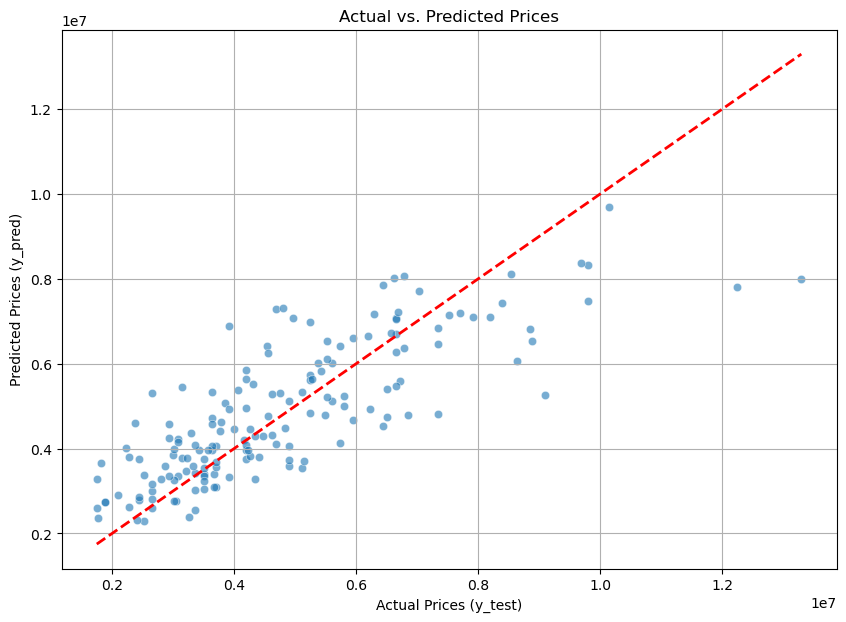


Re-interpreting Coefficients:
                            Feature   Coefficient
2                         bathrooms  1.114751e+06
9               airconditioning_yes  6.858393e+05
8               hotwaterheating_yes  6.163754e+05
10                     prefarea_yes  5.091921e+05
7                      basement_yes  4.826035e+05
3                           stories  4.172676e+05
5                      mainroad_yes  4.080737e+05
4                           parking  3.031112e+05
6                     guestroom_yes  2.757105e+05
1                          bedrooms  8.089314e+04
0                              area  2.532873e+02
11  furnishingstatus_semi-furnished -1.216527e+05
12     furnishingstatus_unfurnished -3.911912e+05

Model Intercept: 95784.23

Regression plot generated and coefficients interpreted.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression # Ensure LinearRegression is imported
import numpy as np # Ensure numpy is imported

# Ensure model, X_test, y_test, y_pred are available from previous steps
# If running this snippet independently, load, preprocess, split, and fit the model, and make predictions first.

print("--- Task 3: Step 5 - Plot Regression Line and Interpret Coefficients ---")

# Plotting Actual vs. Predicted Values
# For multiple linear regression, plotting actual vs. predicted values is common
# to visualize the model's performance. Points closer to the diagonal line
# indicate better predictions.
plt.figure(figsize=(10, 7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2) # 45-degree line
plt.xlabel("Actual Prices (y_test)")
plt.ylabel("Predicted Prices (y_pred)")
plt.title("Actual vs. Predicted Prices")
plt.grid(True)
plt.savefig('actual_vs_predicted_prices.png') # Save the plot
plt.show() # Display the plot

# Re-interpreting Coefficients (from Step 3, but reiterating for completeness)
# Coefficients indicate the impact of each feature on the predicted price.
print("\nRe-interpreting Coefficients:")
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients_df.sort_values(by='Coefficient', ascending=False)) # Sort for better readability

print(f"\nModel Intercept: {model.intercept_:.2f}")

print("\nRegression plot generated and coefficients interpreted.")

### Observations

* **Actual vs. Predicted Plot:** The scatter plot shows the relationship between the actual house prices and the prices predicted by our model. Points clustered closely around the red diagonal line indicate accurate predictions. A wider spread suggests more error.
* **Coefficient Interpretation:**
    * Features with larger positive coefficients (e.g., 'area', 'bathrooms') have a strong positive impact on house price, meaning an increase in these features is associated with a higher predicted price.
    * Features with larger negative coefficients (e.g., 'furnishingstatus_unfurnished') have a negative impact, meaning their presence is associated with a lower predicted price.
    * Coefficients of binary (0/1) features indicate the average increase/decrease in price when that feature is present compared to its absence, holding all other features constant.
* **Overall:** The plot and coefficients provide a comprehensive view of how well the model is performing and which features are most influential in predicting house prices.